In [1]:
#import libraries for pre-processing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# import all what you need for machine learning
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('../Dataset/cleaned data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34852 entries, 0 to 34851
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34852 non-null  object 
 1   Address        34852 non-null  object 
 2   Rooms          34852 non-null  float64
 3   Type           34852 non-null  object 
 4   Price          34852 non-null  float64
 5   Method         34852 non-null  object 
 6   SellerG        34852 non-null  object 
 7   Date           34852 non-null  object 
 8   Distance       34852 non-null  float64
 9   Postcode       34852 non-null  float64
 10  Bedroom2       34852 non-null  float64
 11  Bathroom       34852 non-null  float64
 12  Car            34852 non-null  float64
 13  Landsize       34852 non-null  float64
 14  BuildingArea   34852 non-null  float64
 15  YearBuilt      34852 non-null  float64
 16  CouncilArea    34852 non-null  object 
 17  Lattitude      34852 non-null  float64
 18  Longti

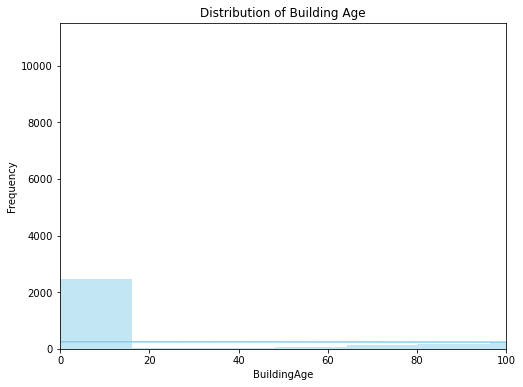

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Landsize'], kde=True, color='skyblue')
plt.title('Distribution of Building Age')
plt.xlabel('BuildingAge')
plt.xlim(0, 100)
plt.ylabel('Frequency')
plt.show()

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['MonthSold'] = data['Date'].dt.month
data['YearSold'] = data['Date'].dt.year

In [5]:
data.shape

(34852, 23)

In [6]:
data['BuildingAge'] = 2018 - data['YearBuilt']

In [7]:
data['BuildingAge'].loc[data['BuildingAge']<0] = 0

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15276/2321189584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuildingAge'].loc[data['BuildingAge']<0] = 0


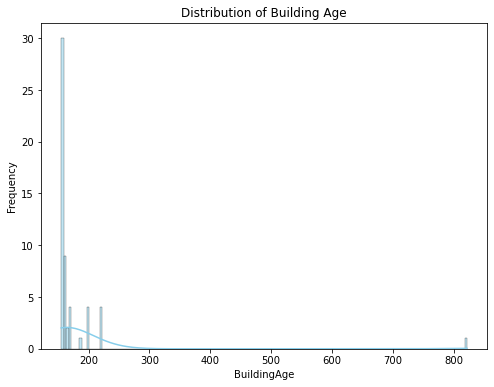

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['BuildingAge'].loc[data['BuildingAge']>150], kde=True, color='skyblue')
plt.title('Distribution of Building Age')
plt.xlabel('BuildingAge')
plt.ylabel('Frequency')
plt.show()

In [9]:
q3, q1 = np.percentile(data['BuildingAge'], [75 ,25])
iqr = q3 - q1

print((q3+1.5*iqr))

data2= data[data['BuildingAge'] < (q3+1.5*iqr)]
data2.shape

166.5


(34838, 24)

In [10]:
data2.shape

(34838, 24)

In [11]:
data2['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

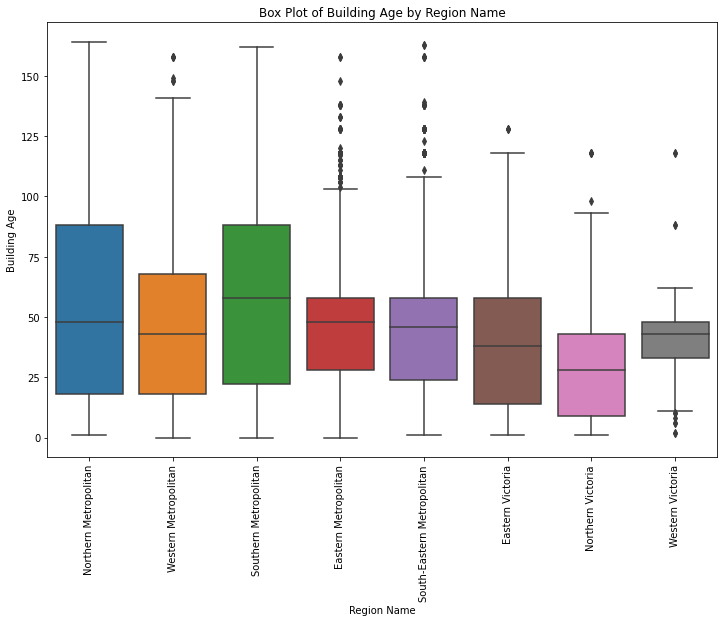

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Regionname', y='BuildingAge', data=data2)
plt.title('Box Plot of Building Age by Region Name')
plt.xticks(rotation=90) 
plt.xlabel('Region Name')
plt.ylabel('Building Age')
plt.show()

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34838 entries, 0 to 34851
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34838 non-null  object        
 1   Address        34838 non-null  object        
 2   Rooms          34838 non-null  float64       
 3   Type           34838 non-null  object        
 4   Price          34838 non-null  float64       
 5   Method         34838 non-null  object        
 6   SellerG        34838 non-null  object        
 7   Date           34838 non-null  datetime64[ns]
 8   Distance       34838 non-null  float64       
 9   Postcode       34838 non-null  float64       
 10  Bedroom2       34838 non-null  float64       
 11  Bathroom       34838 non-null  float64       
 12  Car            34838 non-null  float64       
 13  Landsize       34838 non-null  float64       
 14  BuildingArea   34838 non-null  float64       
 15  YearBuilt      3483

In [14]:
data3 = data2.drop(columns = ['Address','Lattitude','Longtitude','Suburb','CouncilArea'])

In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34838 entries, 0 to 34851
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rooms          34838 non-null  float64       
 1   Type           34838 non-null  object        
 2   Price          34838 non-null  float64       
 3   Method         34838 non-null  object        
 4   SellerG        34838 non-null  object        
 5   Date           34838 non-null  datetime64[ns]
 6   Distance       34838 non-null  float64       
 7   Postcode       34838 non-null  float64       
 8   Bedroom2       34838 non-null  float64       
 9   Bathroom       34838 non-null  float64       
 10  Car            34838 non-null  float64       
 11  Landsize       34838 non-null  float64       
 12  BuildingArea   34838 non-null  float64       
 13  YearBuilt      34838 non-null  float64       
 14  Regionname     34838 non-null  object        
 15  Propertycount  3483

In [16]:
data3['LogPrice'] = np.log(data3['Price'])
data3

,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,MonthSold,YearSold,BuildingAge,LogPrice
0,2.0,h,707435.52,SS,Jellis,2016-09-03,2.5,3067.0,2.0,1.0,1.0,126.0,84.3,1900.0,Northern Metropolitan,4019.0,9,2016,118.0,13.469402
1,2.0,h,1480000.00,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,194.2,1900.0,Northern Metropolitan,4019.0,12,2016,118.0,14.207553
2,2.0,h,1035000.00,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,2,2016,118.0,13.849912
3,3.0,u,1186997.35,VB,Rounds,2016-02-04,2.5,3067.0,3.0,2.0,1.0,0.0,80.0,1900.0,Northern Metropolitan,4019.0,2,2016,118.0,13.986937
4,3.0,h,1465000.00,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,3,2017,118.0,14.197366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,2.0,h,705000.00,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2018.0,Western Metropolitan,6543.0,2,2018,0.0,13.465953
34848,2.0,h,1140000.00,PI,Jas,2018-02-24,6.3,3013.0,2.0,2.0,0.0,250.0,103.0,2018.0,Western Metropolitan,6543.0,2,2018,0.0,13.946539
34849,2.0,h,1020000.00,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,1.0,1.0,98.0,104.0,2018.0,Western Metropolitan,6543.0,2,2018,0.0,13.835313
34850,2.0,t,705000.00,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Western Metropolitan,6543.0,2,2018,18.0,13.465953


In [17]:
data3[['isOutlierPrice','isOutlierDistance']] = 0

data3['isOutlierPrice'] = np.where(abs(data3['Price'] - data3['Price'].mean()) > 5 * data3['Price'].std(), 1, 0)
data3['isOutlierDistance'] = np.where(abs(data3['Distance'] - data3['Distance'].mean()) > 5 * data3['Distance'].std(), 1, 0)

In [18]:
data3['BuildingAge'].value_counts().sort_index()

0.0       15
1.0      232
2.0      336
3.0      353
4.0      509
        ... 
158.0     25
161.0      4
162.0      2
163.0      3
164.0      2
Name: BuildingAge, Length: 153, dtype: int64

In [19]:
q3, q1 = np.percentile(data3['BuildingAge'], [75 ,25])
iqr = q3 - q1

print((q3+1.5*iqr))

data3= data3[data3['BuildingAge'] < (q3+1.5*iqr)]
data3.shape

166.5


(34838, 22)

In [20]:
data3['isOutlierPrice'].unique()

array([0, 1])

In [21]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34838 entries, 0 to 34851
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rooms              34838 non-null  float64       
 1   Type               34838 non-null  object        
 2   Price              34838 non-null  float64       
 3   Method             34838 non-null  object        
 4   SellerG            34838 non-null  object        
 5   Date               34838 non-null  datetime64[ns]
 6   Distance           34838 non-null  float64       
 7   Postcode           34838 non-null  float64       
 8   Bedroom2           34838 non-null  float64       
 9   Bathroom           34838 non-null  float64       
 10  Car                34838 non-null  float64       
 11  Landsize           34838 non-null  float64       
 12  BuildingArea       34838 non-null  float64       
 13  YearBuilt          34838 non-null  float64       
 14  Region

In [22]:
data4 = data3.drop(columns = ['Method','SellerG','Date','Postcode','isOutlierPrice','isOutlierDistance'])
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34838 entries, 0 to 34851
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34838 non-null  float64
 1   Type           34838 non-null  object 
 2   Price          34838 non-null  float64
 3   Distance       34838 non-null  float64
 4   Bedroom2       34838 non-null  float64
 5   Bathroom       34838 non-null  float64
 6   Car            34838 non-null  float64
 7   Landsize       34838 non-null  float64
 8   BuildingArea   34838 non-null  float64
 9   YearBuilt      34838 non-null  float64
 10  Regionname     34838 non-null  object 
 11  Propertycount  34838 non-null  float64
 12  MonthSold      34838 non-null  int64  
 13  YearSold       34838 non-null  int64  
 14  BuildingAge    34838 non-null  float64
 15  LogPrice       34838 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.5+ MB


In [23]:
type_dummies = pd.get_dummies(data4['Type'], prefix = 'type')
region_dummies = pd.get_dummies(data4['Regionname'], prefix = 'region')
region_dummies

,region_Eastern Metropolitan,region_Eastern Victoria,region_Northern Metropolitan,region_Northern Victoria,region_South-Eastern Metropolitan,region_Southern Metropolitan,region_Western Metropolitan,region_Western Victoria
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
34847,0,0,0,0,0,0,1,0
34848,0,0,0,0,0,0,1,0
34849,0,0,0,0,0,0,1,0
34850,0,0,0,0,0,0,1,0


In [24]:
housetype = data4['Type']
region = data4['Regionname']

le = OrdinalEncoder()
data4['Type'] = le.fit_transform(data4[['Type']])
le = OrdinalEncoder()
data4['Regionname'] = le.fit_transform(data4[['Regionname']])

data5 = pd.concat([data4, type_dummies, region_dummies], axis=1)
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34838 entries, 0 to 34851
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rooms                              34838 non-null  float64
 1   Type                               34838 non-null  float64
 2   Price                              34838 non-null  float64
 3   Distance                           34838 non-null  float64
 4   Bedroom2                           34838 non-null  float64
 5   Bathroom                           34838 non-null  float64
 6   Car                                34838 non-null  float64
 7   Landsize                           34838 non-null  float64
 8   BuildingArea                       34838 non-null  float64
 9   YearBuilt                          34838 non-null  float64
 10  Regionname                         34838 non-null  float64
 11  Propertycount                      34838 non-null  flo

In [25]:
data5.iloc[:,:14].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34838 entries, 0 to 34851
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34838 non-null  float64
 1   Type           34838 non-null  float64
 2   Price          34838 non-null  float64
 3   Distance       34838 non-null  float64
 4   Bedroom2       34838 non-null  float64
 5   Bathroom       34838 non-null  float64
 6   Car            34838 non-null  float64
 7   Landsize       34838 non-null  float64
 8   BuildingArea   34838 non-null  float64
 9   YearBuilt      34838 non-null  float64
 10  Regionname     34838 non-null  float64
 11  Propertycount  34838 non-null  float64
 12  MonthSold      34838 non-null  int64  
 13  YearSold       34838 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 4.0 MB


## Data to use. 

Below shows the data going to be used in Random Forest. 

In [40]:
data = data5.drop(columns = ['Bedroom2','Price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34838 entries, 0 to 34851
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rooms                              34838 non-null  float64
 1   Type                               34838 non-null  float64
 2   Distance                           34838 non-null  float64
 3   Bathroom                           34838 non-null  float64
 4   Car                                34838 non-null  float64
 5   Landsize                           34838 non-null  float64
 6   BuildingArea                       34838 non-null  float64
 7   YearBuilt                          34838 non-null  float64
 8   Regionname                         34838 non-null  float64
 9   Propertycount                      34838 non-null  float64
 10  MonthSold                          34838 non-null  int64  
 11  YearSold                           34838 non-null  int

In [41]:
data.columns.tolist()

['Rooms',
 'Type',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Regionname',
 'Propertycount',
 'MonthSold',
 'YearSold',
 'BuildingAge',
 'LogPrice',
 'type_h',
 'type_t',
 'type_u',
 'region_Eastern Metropolitan',
 'region_Eastern Victoria',
 'region_Northern Metropolitan',
 'region_Northern Victoria',
 'region_South-Eastern Metropolitan',
 'region_Southern Metropolitan',
 'region_Western Metropolitan',
 'region_Western Victoria']

## Train-test split
Split the dataset into training and testing with a ratio of 4:1. The training set is used to train the model while testing is used to evaluate the trained model performance. 

In [42]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['LogPrice']), data['LogPrice'], random_state= 42, test_size=0.2)
x_test

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,...,type_t,type_u,region_Eastern Metropolitan,region_Eastern Victoria,region_Northern Metropolitan,region_Northern Victoria,region_South-Eastern Metropolitan,region_Southern Metropolitan,region_Western Metropolitan,region_Western Victoria
20297,4.0,0.0,6.8,2.0,2.0,150.0,116.6,2005.0,6.0,802.0,...,0,0,0,0,0,0,0,0,1,0
4294,2.0,0.0,3.5,1.0,0.0,136.0,92.0,1890.0,2.0,6244.0,...,0,0,0,0,1,0,0,0,0,0
3160,3.0,0.0,13.6,2.0,2.0,593.6,160.3,2006.0,5.0,3582.0,...,0,0,0,0,0,0,0,1,0,0
33500,3.0,0.0,8.4,4.0,2.0,311.0,137.0,1935.0,5.0,8801.0,...,0,0,0,0,0,0,0,1,0,0
13135,4.0,0.0,7.8,1.0,1.0,318.0,145.0,1960.0,6.0,1808.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,2.0,2.0,3.3,1.0,1.0,0.0,64.0,1970.0,5.0,14887.0,...,0,1,0,0,0,0,0,1,0,0
23025,4.0,0.0,10.4,3.0,2.0,1004.0,188.0,1950.0,5.0,5678.0,...,0,0,0,0,0,0,0,1,0,0
29849,4.0,2.0,21.3,2.0,1.0,593.6,160.3,1910.0,0.0,4407.0,...,0,1,1,0,0,0,0,0,0,0
9706,3.0,0.0,9.7,3.0,3.0,250.0,207.0,2016.0,6.0,3284.0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27870 entries, 28696 to 15804
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rooms                              27870 non-null  float64
 1   Type                               27870 non-null  float64
 2   Distance                           27870 non-null  float64
 3   Bathroom                           27870 non-null  float64
 4   Car                                27870 non-null  float64
 5   Landsize                           27870 non-null  float64
 6   BuildingArea                       27870 non-null  float64
 7   YearBuilt                          27870 non-null  float64
 8   Regionname                         27870 non-null  float64
 9   Propertycount                      27870 non-null  float64
 10  MonthSold                          27870 non-null  int64  
 11  YearSold                           27870 non-null 

## Training Random Forest 

Train the Random Forest model wih x_train and y_train

In [44]:
rf = RandomForestRegressor()
rf.fit(x_train.drop(columns = ['Type','Regionname']), y_train)

RandomForestRegressor()

In [45]:
print(rf.score(x_train.drop(columns = ['Type','Regionname']), y_train))

0.9411611265156681


## Predict and Evaluate
Predict the housing prices using the trained modal and evaluate the performance using r2.

In [46]:
rf_pred = rf.predict(x_test.drop(columns = ['Type','Regionname']))
print(r2_score(y_test, rf_pred))

0.5976841285670398


## Hyperparameter tuning 

Hyperparameter tuning refer to the process of tuning the hyperparameter setting inside the Random Forest to improve the model performance in term of accuracy of their ability to generalize to unseen data (etc. testing set).

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 400, stop = 700, num = 7)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(20, 40, num = 6)]
bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap
              }

print(random_grid)

{'n_estimators': [400, 450, 500, 550, 600, 650, 700], 'max_features': ['sqrt'], 'max_depth': [20, 24, 28, 32, 36, 40], 'bootstrap': [True]}


In [122]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=3, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [20, 24, 28, 32, 36, 40],
                                        'max_features': ['sqrt'],
                                        'n_estimators': [400, 450, 500, 550,
                                                         600, 650, 700]},
                   random_state=42, scoring='r2', verbose=3)

In [182]:
print('Best Score: %s' % rf_random.best_score_)
print('Best Hyperparameters: %s' % rf_random.best_params_)

In [ ]:
rf_random_pred = rf_random.predict(x_test)

r2 = r2_score(y_test, rf_random_pred)
print(r2)

In [125]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(mean_score, params)

0.6094100552423625 {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 32, 'bootstrap': True}
0.6098972050002448 {'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 24, 'bootstrap': True}
0.6090444379473992 {'n_estimators': 450, 'max_features': 'sqrt', 'max_depth': 24, 'bootstrap': True}
0.6086102285129023 {'n_estimators': 650, 'max_features': 'sqrt', 'max_depth': 32, 'bootstrap': True}
0.6111944323224137 {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
0.6088313963912002 {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
0.6091112322319997 {'n_estimators': 650, 'max_features': 'sqrt', 'max_depth': 28, 'bootstrap': True}
0.6086869674592743 {'n_estimators': 450, 'max_features': 'sqrt', 'max_depth': 36, 'bootstrap': True}
0.6083342400695168 {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 36, 'bootstrap': True}
0.6117586378789189 {'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 20, 'bootstra

In [47]:
rf = RandomForestRegressor(n_estimators = 700, max_features= 'sqrt', max_depth= 20, bootstrap= True)

rf.fit(x_train.drop(columns = ['Type','Regionname']), y_train)

rf_pred = rf.predict(x_test.drop(columns = ['Type','Regionname']))
print(r2_score(y_test, rf_pred))

0.6120877508672002


We can see from here hyperparameter tuning improve some r2 score of Random Forest.

## Feature Importance (/)
After training and hyperparameter tuning the Random Forest model, the feature importance of each variable can then be known. Feature importance is computed by accumulating the mean and standard deviation of the impurity decrease within each tree inside the random forest model.

In [50]:
feature_importances = rf.feature_importances_

# Get the names of the features (assuming they are in the same order as in X)
feature_names = x_train.drop(columns=['Type','Regionname']).columns

feature_importance_tuples = list(zip(feature_names, feature_importances))

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
sorted_feature_importance_df.reset_index().drop(columns=['index'])

,Feature,Importance
0,Bathroom,0.193946
1,BuildingArea,0.126128
2,Distance,0.091755
3,Landsize,0.090644
4,Rooms,0.070540
5,Propertycount,0.060909
6,BuildingAge,0.056667
7,YearBuilt,0.055717
8,region_Southern Metropolitan,0.052898
9,MonthSold,0.042203


### What are the top 5 most influncient factor contribute to housing prices in Random Forest? (/)

`Bathroom` is the most influential factor in affect the housing prices, followed by `BuildingArea`, `Distance`, `Landsize`, `Rooms`.

## Train a new model
After hyperparameter tuning, we obtain the best parameter can be set before the training. Hence, we retrain a Random Forest and this time we used the `LabelEncode` variables, `Regionname` and `Type` because the following SHAP process cannot deal with sparse dataset. (dummie variables are sparse).

In [51]:
cat_features = ['Type','Regionname']

x_train = x_train.drop(columns = type_dummies.columns.tolist() + region_dummies.columns.tolist())
x_test = x_test.drop(columns = type_dummies.columns.tolist() + region_dummies.columns.tolist())
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6968 entries, 20297 to 14476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6968 non-null   float64
 1   Type           6968 non-null   float64
 2   Distance       6968 non-null   float64
 3   Bathroom       6968 non-null   float64
 4   Car            6968 non-null   float64
 5   Landsize       6968 non-null   float64
 6   BuildingArea   6968 non-null   float64
 7   YearBuilt      6968 non-null   float64
 8   Regionname     6968 non-null   float64
 9   Propertycount  6968 non-null   float64
 10  MonthSold      6968 non-null   int64  
 11  YearSold       6968 non-null   int64  
 12  BuildingAge    6968 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 762.1 KB


In [52]:
rf = RandomForestRegressor(n_estimators = 700, max_features= 'sqrt', max_depth= 20, bootstrap= True)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=700)

In [53]:
rf_pred = rf.predict(x_test)

r2 = r2_score(y_test, rf_pred)
print(r2)

0.6091171814696592


In [54]:
import shap
shap.initjs()

## SHAP Analysis (/)(Below are all required)
Once the model has been trained, the testing set is then used to evaluate the model’s performance. The testing set is also used in SHAP analysis to calculate the Shapley value. These SHAP values are used to create the interpretability plots such as summary plot, dependence plot and force plot.

In [55]:
rf_explainer = shap.TreeExplainer(rf)

In [56]:
shap_values = rf_explainer.shap_values(shap.sample(x_test, 1000))

### Summary Plot

The x-axis typically represents the predictor's SHAP values. The corresponding SHAP values for that specific feature determinant are represented on the y-axis. Note that SHAP value here refers to the dependent variable, they are having the same scale. The importance of feature determinants can be seen by looking at the y-axis of the SHAP summary plot. `Type` and `Regionname` are categorical variable encoded as numerical values, so the color change here have no meaning. 

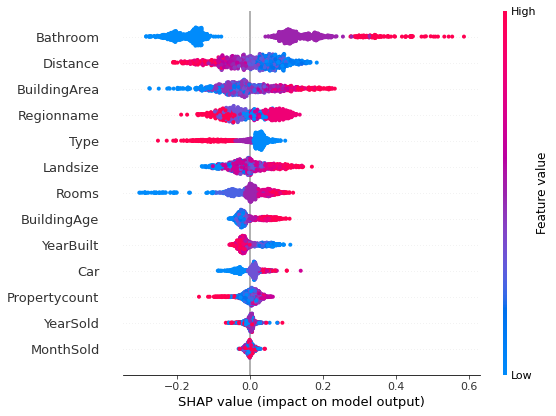

In [57]:
shap.summary_plot(shap_values,shap.sample(x_test, 1000))

The relationship can be determined by observing the direction of colour change. If the SHAP value of a variable increases as the corresponding feature value increase, then this determinant is said to have a positive impact on dependent variable or vice versa. 

As an example, in `Bathroom`, blue colour in left side change to red colour as moving to right side, which means a positive relationship. Besides that, another example is, the positive relationship found in `Rooms`. `Distance` has a negative relationship with `LogPrice`, as the colour changes is red to blue from left to right side. Others seems to have unclear relationships.

We discuss 6 variables to answer our big question.

### Dependence plot
SHAP dependence plot shows some important dependence plots for selected variable. This plot is useful in analyzing the relationship between determinants, including non-linear relationship, by observing the trends.

### How Building Area affect housing prices?

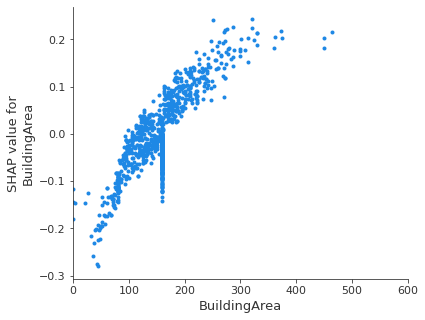

In [121]:
shap.dependence_plot("BuildingArea",shap_values, shap.sample(x_test, 1000), interaction_index = None, show=False)
ax = plt.gca()

ax.set_xlim(-0.5, 600) 
plt.show()

Based on the Shapley value computed by SHAP, from here we observed a generally positive relationship between `BuildingArea` and `LogPrice`. The strange vertical point between 100 and 200 may be the algorithm computed by Random Forest. We can generally say that there exist a positive relastionship. 

### How Number of Bathroom affect housing prices?

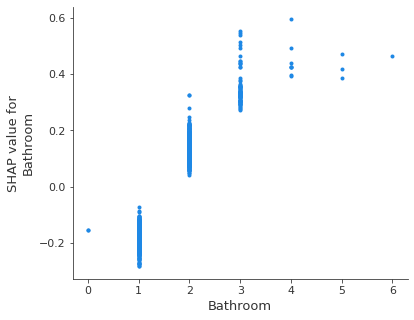

In [132]:
shap.dependence_plot("Bathroom",shap_values, shap.sample(x_test, 1000), interaction_index = None)

Based on the Shapley value computed by SHAP, from here we observed a generally positive relationship between `Bathroom` and `LogPrice`. However, when the number of bathroom is equal or larger than 3, the incresing effect then become constant. Hence, we can conclude that as the number of bathroom increase until 3, the housing price in Melbourne then increase. After number of bathroom larger than 3, it shows no neither increasing or decreasing effect, or at least very small increasing/decreasing effect. 

### How Buiding Age affect housing prices?

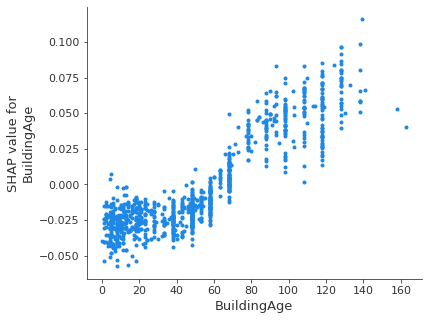

In [122]:
shap.dependence_plot("BuildingAge",shap_values, shap.sample(x_test, 1000), interaction_index = None)

Based on the Shapley value computed by SHAP, from here we observed a generally positive relationship between `BuildingAge` and `LogPrice`. At start, the `BuildingAge` seems to have no relationship with housing price. Until age 40, we can observed increasing trend. We can generally say that there exist a positive relastionship. 

### How Distance toward City affect housing prices?

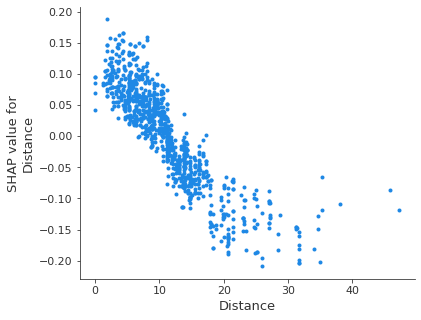

In [123]:
shap.dependence_plot("Distance",shap_values, shap.sample(x_test, 1000), interaction_index = None, show=False)

Based on the Shapley value computed by SHAP, from here we observed a generally negative relationship between `Distance` and `LogPrice`. Strong negative relationship is found between `Distance` of 0 till 20. Starting from 20, `Distance` seems to have no relationship over housing price. We can generally say that there exist a negative relastionship. 

### How Land Size  affect housing prices?

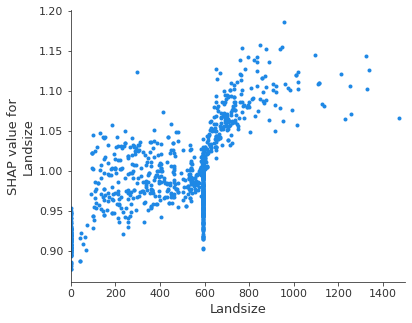

In [62]:
shap.dependence_plot("Landsize",shap_values, shap.sample(x_test, 1000), interaction_index = None, show=False)
ax = plt.gca()

ax.set_xlim(-0.5, 1500) 
plt.show()

In [59]:
shap_values[0]

array([ 0.01825203, -0.04603684,  0.11245252,  0.2163731 ,  0.01782448,
        0.01436129,  0.01395023, -0.00023413, -0.03323741, -0.01767517,
       -0.00467275,  0.00414624, -0.0013679 ])

In [ ]:
shap.dependence_plot("Landsize",shap_values, shap.sample(x_test, 1000), interaction_index = None, show=False)
ax = plt.gca()

ax.set_xlim(-0.5, 1500) 
ax.set_ylim()
plt.show()

Based on the Shapley value computed by SHAP, from here we observed a generally positive relationship between `Landsize` and `LogPrice`. Similar to `BuildingArea`, a strange vertical point in about 600 `Landsize` is found. Again this may be due to the algorithm computed by Random Forest. We can generally say that there exist a positive relastionship.

### How Property Count affect housing prices?

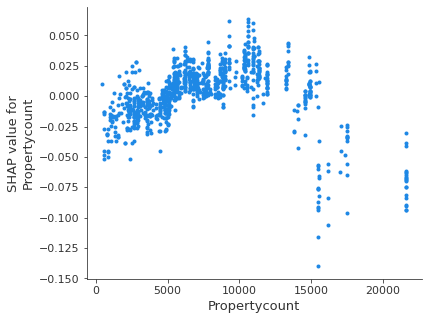

In [82]:
shap.dependence_plot("Propertycount",shap_values, shap.sample(x_test, 1000), interaction_index = None, show=False)

Based on the Shapley value computed by SHAP, we observed a relationship closly to quadratic. There is a increasing trend from 0 to 10000, so we can say that as `Propertycount` increase (until 10000), the `LogPrice` increase too. This is no true starting from 10000, as we can see there is a decreasing trend that greatly affect the `LogPrice`. Hence, this tell us that `Propertycount` has a non-linear relationship but a quadratic trend toward `LogPrice`.

### Force Plot

SHAP force plot shows how a single prediction was done. In our case, it tell us how the 13 variables effect the housing prices. Following shows how the first row, the `LogPrice` is predicted from the SHAP base value.

In [146]:
shap.sample(x_test, 1000).head(1)

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,MonthSold,YearSold,BuildingAge
6732,3.0,2.0,2.8,2.0,2.0,593.6,160.3,2005.0,2.0,17496.0,2,2017,13.0


In [136]:
shap.plots.force(rf_explainer.expected_value, shap_values[0], feature_names=x_train.columns.tolist())